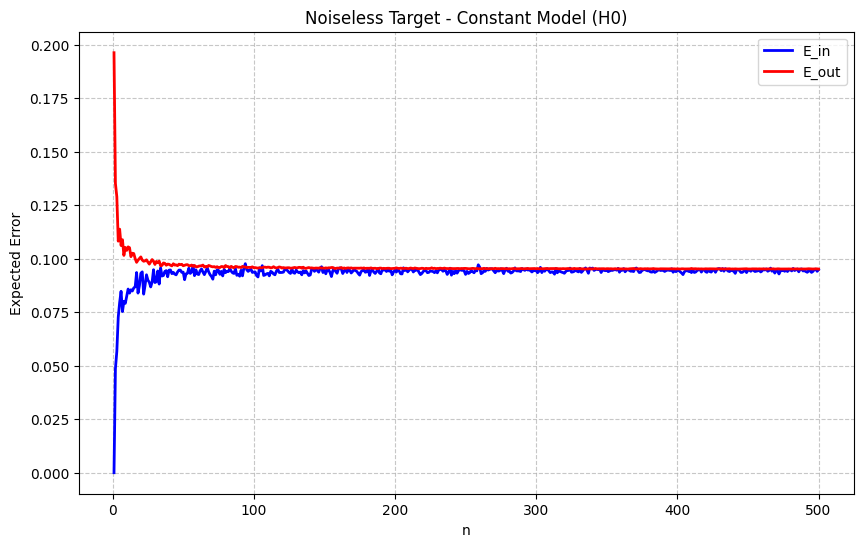

C:\Users\kasea\AppData\Local\Temp\ipykernel_416452\900112806.py:37: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(x_train, y_train, deg=len(inspect.signature(model_func).parameters) - 2)
C:\Users\kasea\AppData\Local\Temp\ipykernel_416452\900112806.py:37: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(x_train, y_train, deg=len(inspect.signature(model_func).parameters) - 2)
C:\Users\kasea\AppData\Local\Temp\ipykernel_416452\900112806.py:37: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(x_train, y_train, deg=len(inspect.signature(model_func).parameters) - 2)
C:\Users\kasea\AppData\Local\Temp\ipykernel_416452\900112806.py:37: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(x_train, y_train, deg=len(inspect.signature(model_func).parameters) - 2)
C:\Users\kasea\AppData\Local\Temp\ipykernel_416452\900112806.py:37: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(x_train, y_train, deg=l

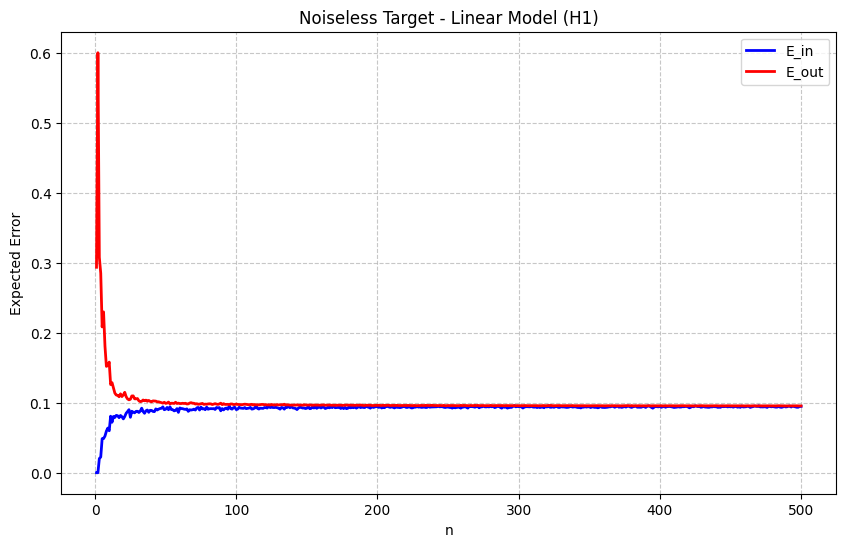

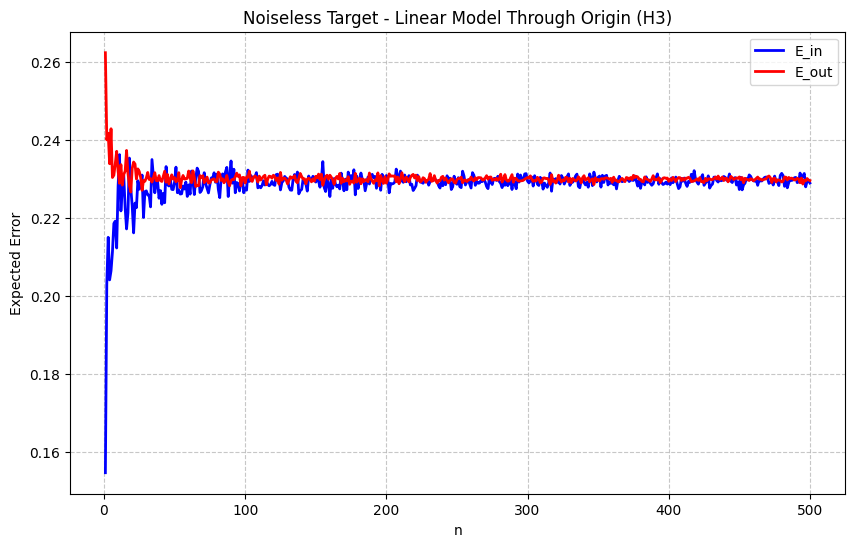

C:\Users\kasea\AppData\Local\Temp\ipykernel_416452\900112806.py:37: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(x_train, y_train, deg=len(inspect.signature(model_func).parameters) - 2)
C:\Users\kasea\AppData\Local\Temp\ipykernel_416452\900112806.py:37: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(x_train, y_train, deg=len(inspect.signature(model_func).parameters) - 2)
C:\Users\kasea\AppData\Local\Temp\ipykernel_416452\900112806.py:37: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(x_train, y_train, deg=len(inspect.signature(model_func).parameters) - 2)
C:\Users\kasea\AppData\Local\Temp\ipykernel_416452\900112806.py:37: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(x_train, y_train, deg=len(inspect.signature(model_func).parameters) - 2)
C:\Users\kasea\AppData\Local\Temp\ipykernel_416452\900112806.py:37: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(x_train, y_train, deg=l

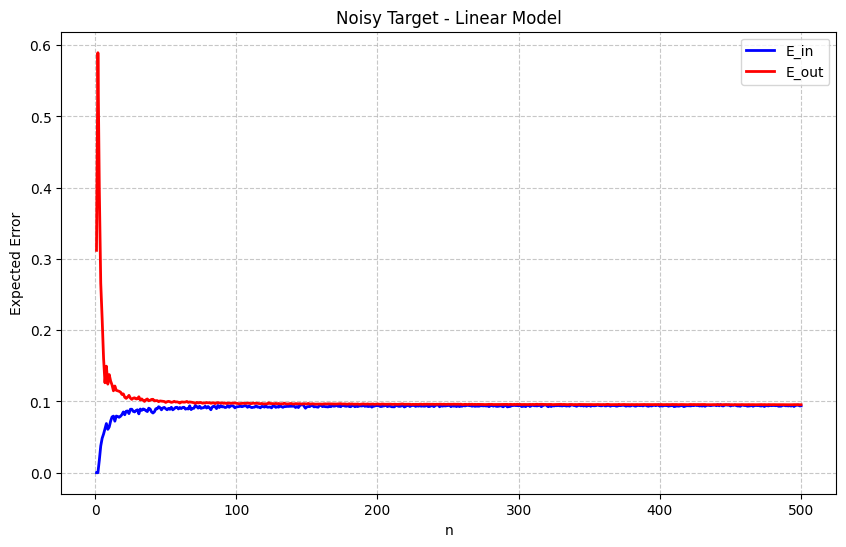

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

def sin_target(x):
    return np.sin(np.pi * x)

def noisy_sin_target(x, noise_level=0.001):
    return np.sin(np.pi * x) + np.random.normal(0, noise_level, x.shape)

def constant_model(x, c):
    return np.full_like(x, c)

def linear_model(x, a, b):
    return a * x + b

def linear_through_origin(x, a):
    return a * x

def calculate_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def generate_learning_curves(target_func, model_func, n_points, n_iterations, num_runs=50):
    x = np.linspace(0, 1, n_points)
    y_true = target_func(x)
    
    e_in_avg = np.zeros(n_iterations)
    e_out_avg = np.zeros(n_iterations)
    
    for _ in range(num_runs):
        e_in = []
        e_out = []
        for n in range(1, n_iterations + 1):
            x_train = np.random.uniform(0, 1, n)
            y_train = target_func(x_train)
            
            params = np.polyfit(x_train, y_train, deg=len(inspect.signature(model_func).parameters) - 2)
            y_pred_train = model_func(x_train, *params)
            y_pred_test = model_func(x, *params)
            
            e_in.append(calculate_error(y_train, y_pred_train))
            e_out.append(calculate_error(y_true, y_pred_test))
        
        e_in_avg += np.array(e_in)
        e_out_avg += np.array(e_out)
    
    return e_in_avg / num_runs, e_out_avg / num_runs

def plot_learning_curves(e_in, e_out, title):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(e_in) + 1), e_in, 'b-', label='E_in', linewidth=2)
    plt.plot(range(1, len(e_out) + 1), e_out, 'r-', label='E_out', linewidth=2)
    plt.xlabel('n')
    plt.ylabel('Expected Error')
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def main():
    n_iterations = 500
    n_points = 1000
    
    # Constant model (H0)
    e_in_const, e_out_const = generate_learning_curves(sin_target, constant_model, n_points, n_iterations)
    plot_learning_curves(e_in_const, e_out_const, 'Noiseless Target - Constant Model (H0)')

    # Linear model (H1)
    e_in_linear, e_out_linear = generate_learning_curves(sin_target, linear_model, n_points, n_iterations)
    plot_learning_curves(e_in_linear, e_out_linear, 'Noiseless Target - Linear Model (H1)')

    # Linear model through origin (H3)
    e_in_linear_origin, e_out_linear_origin = generate_learning_curves(sin_target, linear_through_origin, n_points, n_iterations)
    plot_learning_curves(e_in_linear_origin, e_out_linear_origin, 'Noiseless Target - Linear Model Through Origin (H3)')

    # Noisy target
    e_in_noisy, e_out_noisy = generate_learning_curves(noisy_sin_target, linear_model, n_points, n_iterations)
    plot_learning_curves(e_in_noisy, e_out_noisy, 'Noisy Target - Linear Model')

if __name__ == "__main__":
    main()